# Setup

In [ ]:
#Connecting google drive to Colab to import data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import Pandas and define dataframe as df
import pandas as pd
path = "/content/drive/MyDrive/Barcelona/listings.csv"
df = pd.read_csv(path)

In [ ]:
#Import other libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Data Cleaning

##Verify Data

In [ ]:
#Check the size of data (Rows,columns)
#Total number of listings in Barcelona
df.shape

(17230, 75)

In [ ]:
#To display all the columns
pd.set_option('display.max_columns', None)
df.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20230610001920,2023-06-10,city scrape,Rental unit in Barcelona · ★4.35 · 3 bedrooms ...,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,Mireia And Maria,2010-01-19,"Barcelona, Spain","We are Mireia (43) & Maria (45), two multiling...",within an hour,95%,93%,f,https://a0.muscache.com/im/users/71615/profile...,https://a0.muscache.com/im/users/71615/profile...,la Sagrada Família,46.0,46.0,"['email', 'phone']",t,t,"Barcelona, CT, Spain",la Sagrada Família,Eixample,41.405560,2.172620,Entire rental unit,Entire home/apt,8,NaN,2 baths,3.0,6.0,"[""Refrigerator"", ""Hangers"", ""Wifi"", ""30\"" TV"",...",$210.00,1,1125,1.0,5.0,1125.0,1125.0,2.8,1125.0,NaN,t,0,0,14,18,2023-06-10,35,8,0,2013-05-27,2023-04-07,4.35,4.44,4.65,4.79,4.71,4.82,4.32,HUTB-002062,t,28,28,0,0,0.29
1,23197,https://www.airbnb.com/rooms/23197,20230610001920,2023-06-10,city scrape,Rental unit in Sant Adria de Besos · ★4.77 · 3...,"Beautiful spacious apartment, large terrace, 5...","Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,https://www.airbnb.com/users/show/90417,Etain (Marnie),2010-03-09,"Catalonia, Spain","Hi there, I'm marnie from Australia, though I ...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/44b56...,https://a0.muscache.com/im/pictures/user/44b56...,El Besòs i el Maresme,6.0,9.0,"['email', 'phone']",t,t,"Sant Adria de Besos, Barcelona, Spain",el Besòs i el Maresme,Sant Martí,41.412907,2.220633,Entire rental unit,Entire home/apt,5,NaN,2 baths,3.0,4.0,"[""Fire extinguisher"", ""Oven"", ""Refrigerator"", ...",$250.00,4,300,4.0,7.0,1125.0,1125.0,4.6,1125.0,NaN,t,8,15,39,185,2023-06-10,72,13,2,2011-03-15,2023-05-29,4.77,4.93,4.88,4.94,4.99,4.61,4.63,HUTB005057,f,2,2,0,0,0.48


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17230 entries, 0 to 17229
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            17230 non-null  int64  
 1   listing_url                                   17230 non-null  object 
 2   scrape_id                                     17230 non-null  int64  
 3   last_scraped                                  17230 non-null  object 
 4   source                                        17230 non-null  object 
 5   name                                          17230 non-null  object 
 6   description                                   17120 non-null  object 
 7   neighborhood_overview                         9879 non-null   object 
 8   picture_url                                   17230 non-null  object 
 9   host_id                                       17230 non-null 

In [ ]:
#Check missing values for all the columns before dropping
for column in df.columns:
  #if df[column].isna().sum()>0:

  print(f"{column:-<50} : {df[column].isna().sum()}")


id------------------------------------------------ : 0
listing_url--------------------------------------- : 0
scrape_id----------------------------------------- : 0
last_scraped-------------------------------------- : 0
source-------------------------------------------- : 0
name---------------------------------------------- : 0
description--------------------------------------- : 110
neighborhood_overview----------------------------- : 7351
picture_url--------------------------------------- : 0
host_id------------------------------------------- : 0
host_url------------------------------------------ : 0
host_name----------------------------------------- : 2
host_since---------------------------------------- : 2
host_location------------------------------------- : 3852
host_about---------------------------------------- : 6228
host_response_time-------------------------------- : 3006
host_response_rate-------------------------------- : 3006
host_acceptance_rate----------------------------

##Delete irrelevant columns

In [ ]:
#Create new dataframe keeping only required columns
df=df[['id','listing_url','name','host_since','host_is_superhost','neighbourhood_group_cleansed','accommodates','amenities','price','number_of_reviews','review_scores_rating','latitude','longitude']]

In [ ]:
#Check columns that we have
df.columns

Index(['id', 'listing_url', 'name', 'host_since', 'host_is_superhost',
       'neighbourhood_group_cleansed', 'accommodates', 'amenities', 'price',
       'number_of_reviews', 'review_scores_rating', 'latitude', 'longitude'],
      dtype='object')

In [ ]:
#Drop all listings with review_scores_rating is nill and number_of_reviews=0
df.review_scores_rating.value_counts(dropna=False)
df.dropna(subset=['review_scores_rating'],inplace=True)

<ipython-input-10-dcbab0b901d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['review_scores_rating'],inplace=True)


In [ ]:
#Original data has 17230 listings and after dropping listings with no reviews
#size of df is 13198
df.shape

(13198, 13)

##Filter by 'accomodates' (df1)

In [ ]:
#Assumption:Further filter the data based on <= 2 accommodates suitable for individual digital nomad
#Use loc() for label indexing [Row, column]
df1=df.loc[df.accommodates<3,:]

In [ ]:
#Use Count() to count unique values in 'accommodates'
df1.accommodates.value_counts()

2    4271
1    1523
Name: accommodates, dtype: int64

In [ ]:
#Looks like there is an error as there is a listing which accommodates 0 people
#Lets locate the entry using loc()
df1.loc[df.accommodates==0]

,id,listing_url,name,host_since,host_is_superhost,neighbourhood_group_cleansed,accommodates,amenities,price,number_of_reviews,review_scores_rating,latitude,longitude


In [ ]:
#Looks like the above listing is indeed an error
#Lets drop that entry using drop() & Boolean indexing technique
df1=df1.drop(df1[df1['accommodates']==0].index)

In [ ]:
#Now lets check unique values of accommodates again
#Above entry is dropped
df1.accommodates.value_counts()

2    4271
1    1523
Name: accommodates, dtype: int64

In [ ]:
#Final dataset size
df1.shape

(5794, 13)

In [ ]:
'''#Original dataframe has 17230 listings
#after dropping listings with no review df has 13198 listings and
#after futher filtering by accommodates<3, df1 has 8117 listings'''

'#Original dataframe has 17230 listings\n#after dropping listings with no review df has 13198 listings and\n#after futher filtering by accommodates<3, df1 has 8117 listings'

# Data manipulation

In [ ]:
df1.columns

Index(['id', 'listing_url', 'name', 'host_since', 'host_is_superhost',
       'neighbourhood_group_cleansed', 'accommodates', 'amenities', 'price',
       'number_of_reviews', 'review_scores_rating', 'latitude', 'longitude'],
      dtype='object')

###host_since

In [ ]:
#Lets check what type of info we have
#Info gives details of each column's datatype like int, float, or string
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5794 entries, 4 to 17149
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            5794 non-null   int64  
 1   listing_url                   5794 non-null   object 
 2   name                          5794 non-null   object 
 3   host_since                    5793 non-null   object 
 4   host_is_superhost             2212 non-null   object 
 5   neighbourhood_group_cleansed  5794 non-null   object 
 6   accommodates                  5794 non-null   int64  
 7   amenities                     5794 non-null   object 
 8   price                         5794 non-null   object 
 9   number_of_reviews             5794 non-null   int64  
 10  review_scores_rating          5794 non-null   float64
 11  latitude                      5794 non-null   float64
 12  longitude                     5794 non-null   float64
dtypes:

In [ ]:
#Lets find the experince of host
df1.host_since

4        2010-03-09
7        2010-07-05
8        2011-01-09
12       2011-01-28
14       2011-03-14
            ...    
17060    2018-04-23
17063    2019-08-20
17074    2022-10-04
17104    2019-08-27
17149    2023-04-25
Name: host_since, Length: 5794, dtype: object

In [ ]:
# Lets change the datatype from object to datetime
from datetime import datetime as dt
df1.host_since=pd.to_datetime(df1.host_since)
df1.host_since.dt.year


4        2010.0
7        2010.0
8        2011.0
12       2011.0
14       2011.0
          ...  
17060    2018.0
17063    2019.0
17074    2022.0
17104    2019.0
17149    2023.0
Name: host_since, Length: 5794, dtype: float64

In [ ]:
#Now datetype is changed to float
#Create new column to verify no:of years of experience
df1['host_exp']=dt.today().year-df1.host_since.dt.year
df1.host_exp

4        13.0
7        13.0
8        12.0
12       12.0
14       12.0
         ... 
17060     5.0
17063     4.0
17074     1.0
17104     4.0
17149     0.0
Name: host_exp, Length: 5794, dtype: float64

In [ ]:
#Verify if new column is added to the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5794 entries, 4 to 17149
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            5794 non-null   int64         
 1   listing_url                   5794 non-null   object        
 2   name                          5794 non-null   object        
 3   host_since                    5793 non-null   datetime64[ns]
 4   host_is_superhost             2212 non-null   object        
 5   neighbourhood_group_cleansed  5794 non-null   object        
 6   accommodates                  5794 non-null   int64         
 7   amenities                     5794 non-null   object        
 8   price                         5794 non-null   object        
 9   number_of_reviews             5794 non-null   int64         
 10  review_scores_rating          5794 non-null   float64       
 11  latitude                     

##host_is_superhost

In [ ]:
df1.isna().sum()

id                                 0
listing_url                        0
name                               0
host_since                         1
host_is_superhost               3582
neighbourhood_group_cleansed       0
accommodates                       0
amenities                          0
price                              0
number_of_reviews                  0
review_scores_rating               0
latitude                           0
longitude                          0
host_exp                           1
dtype: int64

In [ ]:
#check unique values in this column including missing values
df1.host_is_superhost.value_counts(dropna=False)

NaN    3582
f      1643
t       569
Name: host_is_superhost, dtype: int64

In [ ]:
#Since there are lot of missing values in this column
#Lets assume missing values as f
df1.host_is_superhost.fillna("f",inplace=True)

In [ ]:
df1.host_is_superhost.value_counts()

f    5225
t     569
Name: host_is_superhost, dtype: int64

In [ ]:
#Alter f or t (strings) to 0 or 1 (integers)
df1['host_is_superhost']=df1.host_is_superhost.replace({'f':0, 't':1})

In [ ]:
df1.host_is_superhost.value_counts()

0    5225
1     569
Name: host_is_superhost, dtype: int64

##price

In [ ]:
df1.price.describe()

count       5794
unique       364
top       $50.00
freq         223
Name: price, dtype: object

In [ ]:
#Convert price from object to int/float and
#also remove $ and Commas
df1.price=df1.price.str.replace('$','').str.replace(',','').astype(float)

<ipython-input-32-4d5ced287eb1>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1.price=df1.price.str.replace('$','').str.replace(',','').astype(float)


In [ ]:
#Now price is displayed as float
df1.price.describe()

count     5794.000000
mean       126.184156
std       1447.327394
min          8.000000
25%         40.000000
50%         63.000000
75%        106.000000
max      90000.000000
Name: price, dtype: float64

In [ ]:
#Check all the listings with proce above 1000
df1[df1['price']>1000]



In [ ]:
#There are a total 15 listings with wrong price or unavailable
#After verifying each listing url, dropping all 15 to avoid skewness in the price and alter dataframe
df1=df1[df1['price']<=1000]


In [ ]:
df1.price.describe()

count    5779.000000
mean       86.735594
std        73.069690
min         8.000000
25%        40.000000
50%        63.000000
75%       105.000000
max       726.000000
Name: price, dtype: float64

<Axes: xlabel='price'>

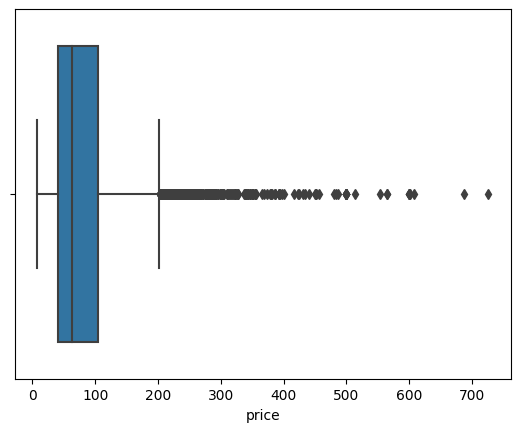

In [ ]:
#plot outliers using boxplot (imported Seaborn already)
sns.boxplot(data=df1,x='price')

In [ ]:
# Identify outliers using interquartile range.
#calculate IQR for 'price' column
Q1 = df1['price'].quantile(0.25)
Q3 = df1['price'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df1[(df1['price'] < Q1 - threshold * IQR) | (df1['price'] > Q3 + threshold * IQR)]

In [ ]:
print( Q1 - threshold * IQR,Q3 + threshold * IQR)

-57.5 202.5


In [ ]:
#So anything less than -59 (which is impossible) or anything above 205 are considered as outliers by this method.
#However, this is just for our reference, we are not deleting outliers based on boxplot!
#although in real world, price per night could be more than 205, based on our assumption that digital nomads make $85k yearly income, its highly unlikely that they are willing to pay more than 205 per night'''

<Axes: xlabel='price', ylabel='Count'>

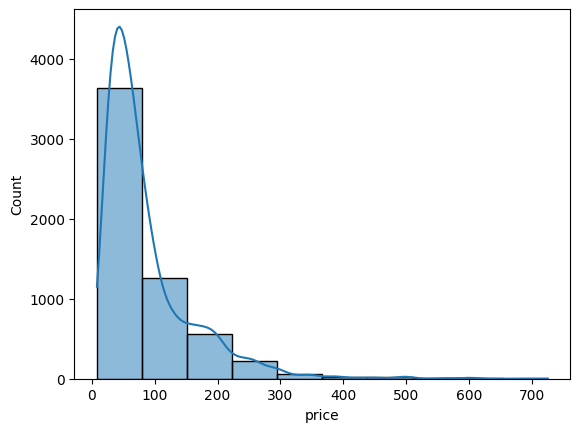

In [ ]:
sns.histplot(data=df1.price, bins=10, kde=True)

In [ ]:
# Helper function to plot histograms based on the
# format of the `sessions` histogram
def histogrammer(df,column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

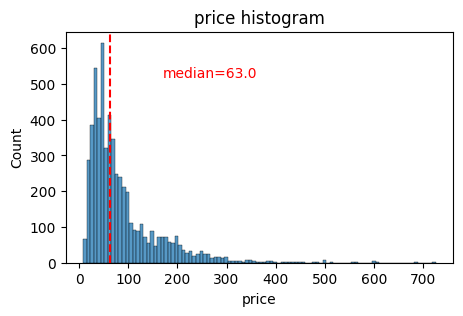

In [ ]:
histogrammer(df1,'price', median_text=True)

##Amenities

In [ ]:
#Create new column for wifi
df1['wifi']=(df1.amenities.str.contains('Wifi', case=False))

In [ ]:
df1['wifi'].sum()/df1.shape[0]

0.9769856376535733

In [ ]:
#Create new column for workspace
df1['workspace']=(df1.amenities.str.contains('workspace', case=False))
df1['workspace'].sum()/df1.shape[0]

0.39435888562034954

##Coworking Place Data

In [ ]:
path = "/content/drive/MyDrive/Barcelona/modified_coordinates.csv"
cwp = pd.read_csv(path)

In [ ]:
cwp.sample(5)
#Dataset includes data for all the cities

,city,name,adress,Google Plus-Code,longitude,latitude
128,Barcelona,Coworking en Barcelona - Coworking Platon,"C/ de Balmes, 177, 08006 Barcelona, Spanien","95W3+F8 Barcelona, Spanien",4139623,2153267
27,Lisbon,Heden Santa Apolónia,"Doca Jardim do Tabaco, Terminal de Cruzeiros d...","PV6G+P7 Lissabon, Portugal",3871186,-912430
151,Barcelona,Eclektic Space I Coworking Poblenou,"Passatge d'Aymà, 8, 08005 Barcelona, Spanien","96X3+3P Barcelona, Spanien",4139763,2204300
31,Lisbon,IDEA Spaces - São Sebastião,"Av. António Augusto de Aguiar 122C, 1050-046 L...","PRMW+8W Lissabon, Portugal",3873327,-915270
42,Lisbon,Nau Coworking,"R. dos Lagares d'El-Rei 19A, 1700-268 Lisboa, ...","PVX8+58 Lissabon, Portugal",3874795,-913414


In [ ]:
# lets Filter cwp data for Barcelona and rename as cwp_bar
# and Drop useless columns
# and Set index with name column
cwp_bar=cwp[cwp.city=='Barcelona'].drop(['city', 'Google Plus-Code', 'adress'], axis=1).set_index('name')

In [ ]:
cwp_bar

,longitude,latitude
name,,
La Vaca Coworking Barcelona,4137409,2161937
OneCoWork Catedral | Barcelona Coworking,4138499,2176744
"betahaus I - Coworking in Barcelona, Gràcia",4140696,2156778
Meet BCN - Coworking Space in Barcelona,4139482,2157991
Barcelona Reial Coworking,4137942,2175059
...,...,...
Coworking Poblenou,4139419,2188538
Acla Coworking,4139832,2167709
Beauty Loft Coworking,4140338,2160729


In [ ]:
cwp_bar.longitude.dtype

dtype('int64')

In [ ]:
# Adjust longitude and latitude in valid format
cwp_bar.longitude=cwp_bar.longitude/100000
cwp_bar.latitude=cwp_bar.latitude/1000000

In [ ]:
# Create a dictionnary dict_cwp for easy iteration
dict_cwp={cwp_bar.index.tolist()[i] :(cwp_bar.longitude.tolist()[i],cwp_bar.latitude.tolist()[i]) for i in range(len(cwp_bar.index.tolist()))}

In [ ]:
'''Import functions for calculating distance from each listing to coworkingspace'''

'Import functions for calculating distance from each listing to coworkingspace'

In [ ]:
df1.price.describe()

count    5779.000000
mean       86.735594
std        73.069690
min         8.000000
25%        40.000000
50%        63.000000
75%       105.000000
max       726.000000
Name: price, dtype: float64

In [ ]:
import math

def distance(origin, destination):
    """
    Calculate the Haversine distance used for calculation between our dataset entries and coworking places.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [ ]:
def get_minimal_distance_from_coworking_place(l,L):
    """
    Get the minimal distance from co-working place listed in the dictionnary dict_cwp build on 'modified_coordinates.csv
    l for longitude
    L for latitude
    Result in km rounded with 3 digits
    """
    origin=(l,L)
    min_dist=""
    for cwp in dict_cwp:
        if min_dist=="":
            min_dist=distance(origin, dict_cwp[cwp])
            continue
        if min_dist<distance(origin, dict_cwp[cwp]):
            continue
        else:
            min_dist=distance(origin, dict_cwp[cwp])
    return round(min_dist,3)


In [ ]:
def get_number_of_coworking_place_less_than_n_km(l,L,n):
    """
    Get the number of co-working place listed in the dictionnary dict_cwp build on 'modified_coordinates.csv'
    within a radius of n kilometers
    l for longitude
    L for latitude
    n : float : lenght of radius within to check the number of co-working place
    Result is integer
    """
    origin=(l,L)
    count=0
    for cwp in dict_cwp:
        if distance(origin, dict_cwp[cwp])<=n:
            count+=1
    return count

In [ ]:
#Find the distance between each listing to the nearest cwp
df1['distance']=df1.apply(lambda x: get_minimal_distance_from_coworking_place(x.latitude,x.longitude), axis=1)

In [ ]:
df1.distance

4        0.105
7        0.307
8        0.255
12       0.203
14       0.110
         ...  
17060    0.707
17063    0.217
17074    0.164
17104    0.255
17149    0.304
Name: distance, Length: 5779, dtype: float64

In [ ]:
#75%of listings are ,500m away from ant cwp
#so lets say any listing which is 500m or less distance is considered attractive
df1.distance.describe()

count    5779.000000
mean        0.438333
std         0.553125
min         0.002000
25%         0.155000
50%         0.257000
75%         0.474000
max         5.612000
Name: distance, dtype: float64

In [ ]:
df1['count_of_cwp_0.5km']=df1.apply(lambda x: get_number_of_coworking_place_less_than_n_km(x.latitude,x.longitude,0.5), axis=1)

#Scoring


In [ ]:
df1.columns

In [ ]:
columns=['price','host_exp','review_scores_rating','distance']

In [ ]:
import numpy as np

In [ ]:
quantiles = np.linspace(0.2, 1, 5)
quantiles

In [ ]:
df_threshold = df1[columns].quantile(quantiles)
df_threshold = df_threshold.reset_index(drop = True)
df_threshold

In [ ]:
def calc_attractiveness(
        data: pd.DataFrame,
        df_threshold: pd.DataFrame,
    ) -> pd.Series:

    for column in df_threshold.columns:
        for idx, threshold in enumerate(df_threshold[column]):
            if idx == 0:
                boolean_series = data[column] <= threshold
            else:
                boolean_series = data[column].between(
                    df_threshold.loc[idx-1, column],
                    df_threshold.loc[idx, column]
                )

            if f'{column} Score' not in data.columns:
                data[f'{column} Score'] = 8 # placeholder to create column
            data.loc[boolean_series, f'{column} Score'] = idx + 1

    return data

In [ ]:
#Create new df 'result'
result = calc_attractiveness(df1, df_threshold)

In [ ]:
result.columns

In [ ]:
reverse_price_quantile = result['price Score'].map(lambda x: 5 - (x - 1))

In [ ]:
reverse_distance_quantile = result['distance Score'].map(lambda x: 5 - (x - 1))

In [ ]:
result['final score'] = 0.5 * reverse_price_quantile + 0.25 * result['review_scores_rating Score'] + 0.15 * reverse_distance_quantile + 0.1 * result['host_exp Score']

In [ ]:
result['final score'] = 0.5 * reverse_price_quantile +  0.1 * result['host_exp Score'] + 0.15 * result['review_scores_rating']
result['final score']

In [ ]:
result.groupby(['neighbourhood_group_cleansed'])['final score'].agg(['min','mean','median','max']).style.background_gradient()

In [ ]:
df1.columns

In [ ]:
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

fig = ff.create_hexbin_mapbox(
    data_frame=result, lat="latitude", lon="longitude",width=1000, height=800,
    nx_hexagon=20, opacity=0.6, min_count=1,color='final score',agg_func=np.mean,
    color_continuous_scale="matter", range_color=[3,4],
    show_original_data=False,
    original_data_marker=dict(size=4, opacity=0.6, color="blue"))


fig.update_layout(mapbox_style="open-street-map")

fig.show()

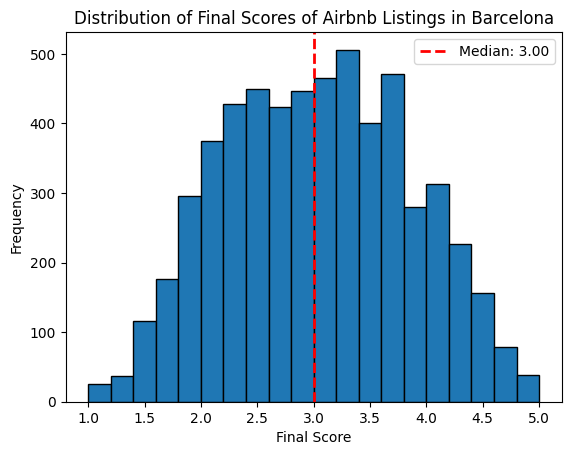

In [86]:
import matplotlib.pyplot as plt

# code to create the histogram
final_scores = result['final score']
plt.hist(final_scores, bins=20, edgecolor='k')  # You can adjust the number of bins
plt.xlabel('Final Score')
plt.ylabel('Frequency')
plt.title('Distribution of Final Scores of Airbnb Listings in Barcelona')

# Calculate the median
median = final_scores.median()

# Add a vertical line for the median
plt.axvline(median, color='r', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')

# Display the legend
plt.legend()

# Display the histogram
plt.show()